___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [2]:
# CODE HERE

In [83]:
df = pd.read_csv('../DATA/Frozen_Dessert_Production.csv', parse_dates=True, index_col='DATE')

In [84]:
df.head()

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**Task: Change the column name to Production**

In [5]:
#CODE HERE

In [85]:
df.columns = ['Production']

In [86]:
df.head()

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636


**TASK: Plot out the time series**

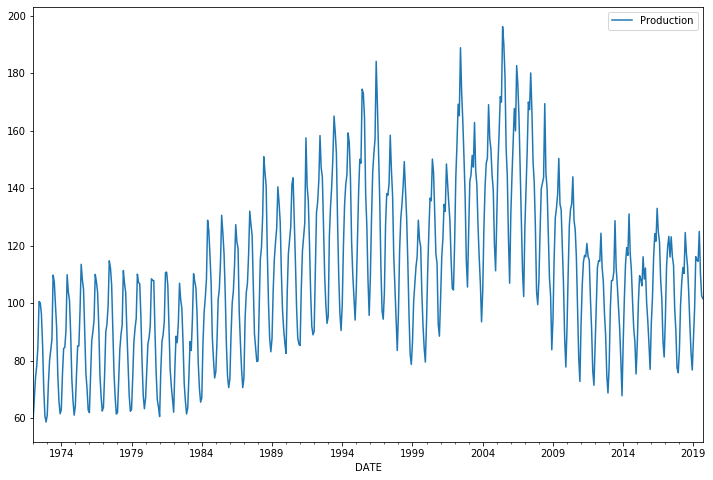

In [87]:
#CODE HERE
df.plot(figsize=(12,8))

## Train Test Split

**TASK: Figure out the length of the data set**

In [26]:
df.shape[0]

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [12]:
#CODE HERE

In [88]:
length = 24

In [89]:
train = df[:-length]

In [90]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [91]:
test = df[-length:]

In [92]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [93]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [60]:
train['Production'].values

array([ 59.9622,  67.0605,  74.235 ,  78.112 ,  84.7636, 100.596 ,
       100.1263,  96.3607,  85.8007,  70.3934,  60.8072,  58.6598,
        61.0996,  72.2062,  80.0984,  83.9059,  87.3712, 109.7467,
       107.3748,  99.6631,  91.6272,  75.3049,  65.9342,  61.5304,
        62.9796,  75.3447,  84.2683,  84.5883,  90.5395, 109.9025,
       103.8903, 101.0265,  89.4762,  73.6952,  66.1573,  61.0653,
        64.2659,  75.4174,  85.169 ,  85.0917,  97.3552, 113.5254,
       108.1455, 104.8251,  90.1157,  75.7187,  70.2168,  62.7436,
        61.9418,  74.0597,  86.9646,  90.131 ,  94.1542, 110.0257,
       107.4617, 103.8183,  92.238 ,  75.1034,  67.532 ,  62.483 ,
        63.7684,  75.0613,  90.0211,  92.6645,  99.12  , 114.723 ,
       112.3297, 106.4137,  91.7217,  76.0245,  67.3937,  61.4415,
        61.888 ,  72.8712,  83.9315,  89.0592,  92.4522, 111.3258,
       106.9251, 103.6909,  90.6197,  79.1839,  67.8849,  62.4032,
        63.0121,  73.9406,  86.4275,  91.2026,  94.7007, 110.1

In [94]:
scaler = MinMaxScaler()

scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [95]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [96]:
#CODE HERE
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [97]:
length = 18

train_gen = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [98]:
train_gen[0]

(array([[[0.00947104],
         [0.06108982],
         [0.11326273],
         [0.14145625],
         [0.18982663],
         [0.30495972],
         [0.30154406],
         [0.27416065],
         [0.19736841],
         [0.08532665],
         [0.01561588],
         [0.        ],
         [0.01774221],
         [0.09850931],
         [0.15590133],
         [0.18358944],
         [0.20878908],
         [0.37150354]]]),
 array([[0.3542551]]))

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [99]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [100]:
n_features = 1

In [128]:
model = Sequential()

model.add(LSTM(100, input_shape = (length, n_features)))

model.add(Dense(1))

model.compile(loss='mse', optimizer = 'adam')

In [102]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [103]:
# CODE HERE
test_gen = TimeseriesGenerator(scaled_test, scaled_test, length=length)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [124]:
#CODE HERE
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

In [105]:
early_stop = EarlyStopping(monitor='val_loss', patience=4)

In [125]:
# CODE HERE
logs_directory = 'logs/fit1'
tensor = TensorBoard(log_dir=logs_directory, histogram_freq=1, 
                     write_graph=True,
    write_images=True,
    update_freq='epoch',
    profile_batch=2,
    embeddings_freq=1)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [129]:
# CODE HERE
model.fit_generator(train_gen, epochs=20, callbacks=[early_stop, tensor], validation_data=test_gen)

Epoch 1/20
531/531 [==============================] - 42s 79ms/step - loss: 0.0234 - val_loss: 0.0171
Epoch 2/20
531/531 [==============================] - 37s 71ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 3/20
531/531 [==============================] - 36s 67ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 4/20
531/531 [==============================] - 39s 73ms/step - loss: 0.0036 - val_loss: 0.0035
Epoch 5/20
531/531 [==============================] - 32s 61ms/step - loss: 0.0031 - val_loss: 0.0018
Epoch 6/20
531/531 [==============================] - 34s 65ms/step - loss: 0.0032 - val_loss: 0.0019
Epoch 7/20
531/531 [==============================] - 32s 60ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 8/20
531/531 [==============================] - 33s 61ms/step - loss: 0.0031 - val_loss: 0.0042
Epoch 9/20
531/531 [==============================] - 32s 61ms/step - loss: 0.0032 - val_loss: 0.0017
Epoch 10/20
531/531 [==============================] - 33s 61ms/step - loss: 0.003

**TASK: Plot the history of the loss that occured during training.**

In [107]:
# CODE HERE
loss = pd.DataFrame(model.history.history)

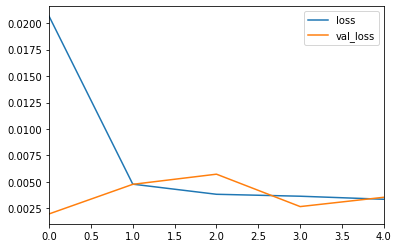

In [108]:
loss.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [109]:
test.shape

(24, 1)

In [114]:
# CODE HERE
test_predictions = []

first_eval_batch = scaled_train[-length:] 

current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    prediction = model.predict(current_batch)[0]
    
    #print(prediction)
    
    test_predictions.append(prediction)
    
    current_batch = np.append(current_batch[:,1:,:], [[prediction]], axis = 1)

In [115]:
test_predictions

[array([0.25714165], dtype=float32),
 array([0.23066643], dtype=float32),
 array([0.24029754], dtype=float32),
 array([0.290738], dtype=float32),
 array([0.3573011], dtype=float32),
 array([0.42738813], dtype=float32),
 array([0.4843735], dtype=float32),
 array([0.52106214], dtype=float32),
 array([0.5234971], dtype=float32),
 array([0.48657098], dtype=float32),
 array([0.42088735], dtype=float32),
 array([0.3482133], dtype=float32),
 array([0.29147077], dtype=float32),
 array([0.27347007], dtype=float32),
 array([0.2946126], dtype=float32),
 array([0.35388762], dtype=float32),
 array([0.4268086], dtype=float32),
 array([0.5003003], dtype=float32),
 array([0.5570735], dtype=float32),
 array([0.5917355], dtype=float32),
 array([0.59510326], dtype=float32),
 array([0.56248903], dtype=float32),
 array([0.49798623], dtype=float32),
 array([0.41812474], dtype=float32)]

In [116]:
test_predictions_inver = scaler.inverse_transform(test_predictions)

In [118]:
test['Predictions'] = test_predictions_inver

/Applications/anaconda3/envs/mytfenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,94.020351
2017-11-01,77.4378,90.379640
2017-12-01,75.8118,91.704052
2018-01-01,83.4343,98.640314
2018-02-01,99.4899,107.793666
2018-03-01,107.3152,117.431609
2018-04-01,112.4309,125.267890
2018-05-01,110.3544,130.313086
2018-06-01,124.5841,130.647928


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

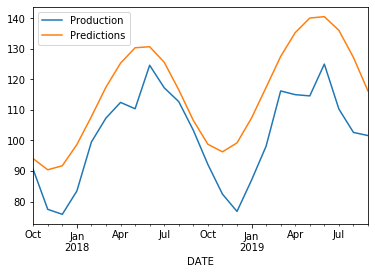

In [121]:
# CODE HERE
test.plot()

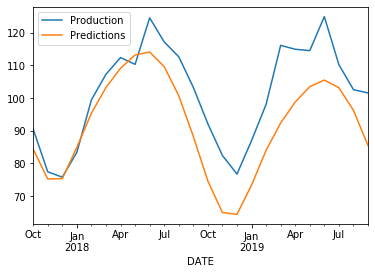

**TASK: Calculate your RMSE.**

In [1]:
#CODE HERE

In [122]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
def metrics(y_true, y_pred):
    print('MAE:', mean_absolute_error(y_true, y_pred))
    print('MSE:', mean_squared_error(y_true, y_pred))
    print('RMSE:', np.sqrt(mean_squared_error(y_true, y_pred)))

In [123]:
metrics(test['Production'], test['Predictions'])

MAE: 14.173351275991953
MSE: 248.20899827033182
RMSE: 15.75465005229668
